In [1]:
from ipywidgets import widgets as wg  #These two are the libraries that let me create widgets for interactive 
from ipywidgets import HBox, VBox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cpy
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker


In [2]:
def set_up_map(ax, x0, x1, y0, y1):
    """
    Adds coastline, etc.
    
    x0, x1: longitude bounds to zoom into
    y0, y1: latitude bounds to zoom into
    """
    
    # set up land overlay
    ax.add_feature(cfeature.LAND, facecolor='green')
    
    # set up ocean overlay
    ax.add_feature(cfeature.OCEAN)
    
    # zoom in on region of interest
    ax.set_extent([x0, x1, y0, y1])
    
    # set nicer looking ticks
    ax.set_xticks(np.arange(x0, x1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(y0, y1, 10), crs=ccrs.PlateCarree())
    lat_lon_formatter(ax)
def lat_lon_formatter(ax):
    """
    Creates nice latitude/longitude labels
    for maps
    """
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=16)

# Original Table

In [3]:
"""
This first part allows the user input the name of their Excel file,
the file name should be exact and it should include the file extension
it returns the original excel table with pandas
"""
file = input('Enter file name: ') # Iso_data.xlsx
df = pd.read_excel(file)
Car = df[input('Enter column name for Carbon: ')] # d13Corganic (permil, VPDB)
Nit = df[input('Enter column name for Nitrogen: ')] # d15N (permil, AIR)
Lat = df[input('Enter Latitude column name: ')] # Latitude
Lon = df[input('Enter Longitude column name: ')] # Longitude

df


Enter file name: Iso_data.xlsx
Enter column name for Carbon: d13Corganic (permil, VPDB)
Enter column name for Nitrogen: d15N (permil, AIR)
Enter Latitude column name: Latitude
Enter Longitude column name: Longitude


,Species,Sample ID,Size (in inches),"d15N (permil, AIR)","d13Corganic (permil, VPDB)",%N,TOC (%),Latitude,Longitude
0,Red Snapper,HB-1-1,15.50,12.95,-17.45,14.50,45.17,-96.60,26.90
1,G. Amberjack,HB-1-2,34.00,13.85,-17.43,14.22,45.12,-96.60,26.90
2,Red Snapper,HB-2-3,24.00,11.44,-18.53,14.07,46.44,-96.56,26.68
3,G. Amberjack,HB-3-4,25.75,13.58,-17.49,14.21,44.65,-96.53,26.67
4,Blackfin Tuna,HB-4-5,25.00,11.40,-17.55,14.09,46.41,-96.61,26.63
5,Red Snapper,HB-4-6,23.00,11.11,-18.81,13.81,45.81,-96.61,26.63
6,Red Snapper,HB-4-7,26.00,11.35,-17.59,14.20,46.49,-96.61,26.63
7,Red Snapper,HB-5-8,23.00,10.84,-18.76,14.10,45.35,-96.77,26.90
8,Red Snapper,HB-5-9,22.00,10.96,-18.51,14.53,45.00,-96.77,26.90
9,G. Amberjack,HB-6-10,33.00,13.94,-17.35,14.50,45.19,-96.60,26.63


# Corrected values and uncorrected values

In [4]:
# This corrects the data and adds a new column to the excel sheet with the corrected carbon values
Corr = df['Corrected'] = Car - 3.32 + 0.99 * (Car/Nit)
# Shows the new column with the new values vs the old column
CorrvCar= df[['Corrected', 'd13Corganic (permil, VPDB)']]
CorrvCar

,Corrected,"d13Corganic (permil, VPDB)"
0,-22.104015,-17.45
1,-21.995899,-17.43
2,-23.453558,-18.53
3,-22.085044,-17.49
4,-22.394079,-17.55
5,-23.806139,-18.81
6,-22.444282,-17.59
7,-23.793321,-18.76
8,-23.501980,-18.51
9,-21.902174,-17.35


In [5]:
'''Here we start building the basic GUI, where in each slider we define
the starting value in the slider, the minimum and maximum values and by
how much does the value increases when you move the slider
'''
x0_slider = wg.FloatSlider(value = 0., min =-180., max = 180.0,step = 0.01,
                           description = 'x1',readout_format = '.1f',)

x1_slider = wg.FloatSlider(value = 0.,min =-180., max = 180.0, step = 0.01,
    description = 'x2', readout_format = '.1f',)

y0_slider = wg.FloatSlider(value = 0., min =-90., max = 90.0, step = 0.01,
    description = 'y1', readout_format = '.1f',)  
y1_slider = wg.FloatSlider(value = 0., min =-90., max = 90.0, step = 0.01,
    description = 'y2', readout_format = '.1f',)

In [6]:
'''
Here we assign the sliders into variables and this function is defined
so it is easier to call back everything later on.
'''
def map_it(b=None):
    '''these variables will be defined by the value reflected on the sliders
    they will change if the slider changes'''
    x0= x0_slider.value
    x1 = x1_slider.value
    y0 = y0_slider.value
    y1 = y1_slider.value
    '''
    The following is the actual plot for the map,
    the ccrs.PlateCarre() term is the map projection from Cartopy'''
   
    f, ax = plt.subplots(ncols=1, figsize=(6,6),
                     subplot_kw=dict(projection=ccrs.PlateCarree()))
    '''
    We then call back the set_up_map function, when the variables
    controlled with the sliders change, it also changes where the
    map will zoom in.
    '''
    set_up_map(ax, x0, x1, y0, y1)
    # In this case it just complementary, it shows sampling sites in map
    ax.scatter(Lat,Lon)
    
    
button = wg.Button(description = 'Map it!',)

@button.on_click
def plot_on_click(b):
    map_it()

In [7]:
# Here we are storing the sliders into a virtual box
tab1 = VBox([x0_slider, x1_slider, y0_slider, y1_slider])
tab2 = wg.Output()

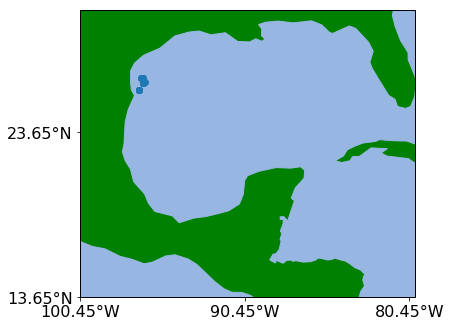

In [8]:
%matplotlib inline
tab = wg.Tab(children =[tab1, tab2]) # we introduce tab 1 and 2 into the tab widget
# Setting the titles of the tabs
tab.set_title(0,'Map')
tab.set_title(1, 'Plot')

with tab2:
    data = [Car, Corr]
    fig, ax = plt.subplots()
    ax.set_title('Raw vs Corrected d13 C')
    ax.set_ylabel('d13 Carbon')

    ax.yaxis.grid(True, linestyle ='-', which = 'major', color = 'lightgrey',
                 alpha = 0.5)
    ax.boxplot(data)
    plt.show()
    '''fig, ax = plt.subplots(figsize = (6,6), nrows = 1, ncols = 2, sharey = True)


# plot and titles for the scatter plot for corrected Carbon values
    ax[0].scatter(Corr, Nit)
    ax[0].set_title('Corrected d13 C Values')
    ax[0].set(xlabel = 'd13 C (Corrected)')
    ax[0].plot(np.unique(Corr), np.poly1d(np.polyfit(Corr, Nit, 1))(np.unique(Corr)))
# plots share y label
    ax[0].set(ylabel = 'd15 N')

    ax[1].scatter(Car, Nit)
    ax[1].set(xlabel = 'd13 C')
    ax[1].set_title('Raw d13 C Values')
    ax[1].plot(np.unique(Car), np.poly1d(np.polyfit(Car, Nit, 1))(np.unique(Car)))
    plt.show(fig)'''
    

    

VBox(children = [tab, button])